In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Load preprocessed dataset
data = np.load("../model_training/processed_data.npz", allow_pickle=True)
X_train, X_val = data["X_train"], data["X_val"]
y_train, y_val = data["y_train"], data["y_val"]
class_names = data["class_names"]

# Print shape
print(f"Train data shape: {X_train.shape}, Validation data shape: {X_val.shape}")
print(f"Classes: {class_names}")

Train data shape: (445, 128, 128, 3), Validation data shape: (112, 128, 128, 3)
Classes: ['cats' 'dogs']


In [3]:
# Define the model using Input layer
model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),  # Define input shape with the Input layer
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(len(class_names), activation="softmax")
])

# Compile model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [4]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.5553 - loss: 3.5207 - val_accuracy: 0.4286 - val_loss: 0.7030
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.5227 - loss: 0.6918 - val_accuracy: 0.4286 - val_loss: 0.6945
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.5388 - loss: 0.6909 - val_accuracy: 0.4464 - val_loss: 0.6969
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.6382 - loss: 0.6599 - val_accuracy: 0.5714 - val_loss: 0.6862
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.7263 - loss: 0.5566 - val_accuracy: 0.5982 - val_loss: 0.7272
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.8254 - loss: 0.3972 - val_accuracy: 0.5446 - val_loss: 0.9108
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.9025 - loss: 0.2740 - val_accuracy: 0.5893 - val_loss: 0.8055
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.9407 - loss: 0.2470 - val_accuracy: 0.

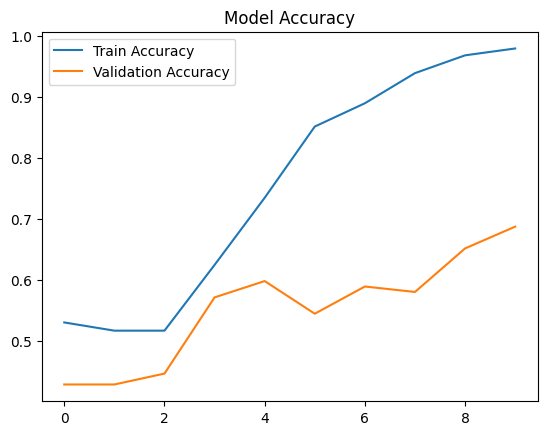

In [5]:
# Plot training history
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()

In [6]:
# Save trained model
model.save("../model/model.h5")
print("Model saved successfully!")

Model saved successfully!
